In [30]:
import pandas as pd
import numpy as np


racing = pd.read_csv('data.csv')


In [31]:
pd.options.display.float_format = '{:.0f}'.format
# col names 
racing.columns.tolist()
#racing['SESSION_IDENTIFIER'] = racing['SESSION_IDENTIFIER'].apply(lambda x: '{:.0f}'.format(x))



['SESSION_IDENTIFIER',
 'LAP_NUM',
 'FB_DIST_FROM_LEFT',
 'FB_DIST_FROM_RIGHT',
 'FB_XPOS',
 'FB_YPOS',
 'FB_SPEED',
 'FB_LAP_DIST',
 'FB_THROTTLE',
 'FB_BRAKE',
 'FB_STEERING',
 'FB_CURR_LAPTIME',
 'FB_GEAR',
 'FB_ENGINE_RPM',
 'FB_DIST_APEX_1',
 'FB_DIST_APEX_2',
 'FB_ANGLE_APEX_1',
 'FB_ANGLE_APEX_2',
 'MB_DIST_FROM_LEFT',
 'MB_DIST_FROM_RIGHT',
 'MB_XPOS',
 'MB_YPOS',
 'MB_SPEED',
 'MB_LAP_DIST',
 'MB_THROTTLE',
 'MB_BRAKE',
 'MB_STEERING',
 'MB_CURR_LAPTIME',
 'MB_GEAR',
 'MB_ENGINE_RPM',
 'MB_DIST_APEX_1',
 'MB_DIST_APEX_2',
 'MB_ANGLE_APEX_1',
 'MB_ANGLE_APEX_2',
 'FS_DIST_FROM_LEFT',
 'FS_DIST_FROM_RIGHT',
 'FS_XPOS',
 'FS_YPOS',
 'FS_SPEED',
 'FS_LAP_DIST',
 'FS_THROTTLE',
 'FS_BRAKE',
 'FS_STEERING',
 'FS_CURR_LAPTIME',
 'FS_GEAR',
 'FS_ENGINE_RPM',
 'FS_DIST_APEX_1',
 'FS_DIST_APEX_2',
 'FS_ANGLE_APEX_1',
 'FS_ANGLE_APEX_2',
 'MS_DIST_FROM_LEFT',
 'MS_DIST_FROM_RIGHT',
 'MS_XPOS',
 'MS_YPOS',
 'MS_SPEED',
 'MS_LAP_DIST',
 'MS_THROTTLE',
 'MS_BRAKE',
 'MS_STEERING',
 'MS_CURR

In [32]:
# no nulls ! 
nullCount = racing.isnull().sum()
if nullCount[nullCount > 0].count() > 0: 
    print('Houston we have a null...')


In [33]:
# correlations / EDA stuff 
# check which cols use strings instead of floats - drop 
stringCheck = racing.select_dtypes(include=['object']).columns
#print(stringCheck) # 'SESSION IDENTIFIER' uses string

# excluding SESSION_IDENTIFIER, YEAR and LAP_NUM (just identifiers, not relevant IMO) 
# dropping all cols with 'gear' since we assume automatic transmission - team themselves said no real difference found between MT and AT 
# diff cols with 'GEAR' based on position (e.g. FS_GEAR, MB_GEAR) - so collate into list for dropping - drop ENGINE_RPM too 
gearCols = [col for col in racing.columns if 'GEAR' in col or 'ENGINE_RPM' in col]
dropCols = ['SESSION_IDENTIFIER','YEAR','LAP_NUM', 'MT_GEAR']
dropCols.extend(gearCols)

numRacingCols = racing.drop(columns=dropCols)
numRacingCols.head()

,FB_DIST_FROM_LEFT,FB_DIST_FROM_RIGHT,FB_XPOS,FB_YPOS,FB_SPEED,FB_LAP_DIST,FB_THROTTLE,FB_BRAKE,FB_STEERING,FB_CURR_LAPTIME,...,TOTAL_BRAKING_387_414,TOTAL_THROTTLE_387_414,TOTAL_BRAKING_414_441,TOTAL_THROTTLE_414_441,TOTAL_BRAKING_441_468,TOTAL_THROTTLE_441_468,TOTAL_BRAKING_468_495,TOTAL_THROTTLE_468_495,TOTAL_BRAKING_495_522,TOTAL_THROTTLE_495_522
0,2,13,304,285,302,264,0,0,0,3103,...,0,26,0,27,0,27,0,27,1,24
1,3,11,271,314,299,221,0,0,0,2569,...,3,18,0,27,0,27,0,27,0,27
2,38,51,409,135,0,425,0,0,-0,9000,...,1,7,1,6,0,10,0,10,0,10
3,9,7,359,221,201,348,0,0,0,5914,...,8,0,4,0,0,3,0,6,0,7
4,2,13,312,276,307,276,0,0,0,3211,...,0,2,0,21,0,27,0,27,1,24


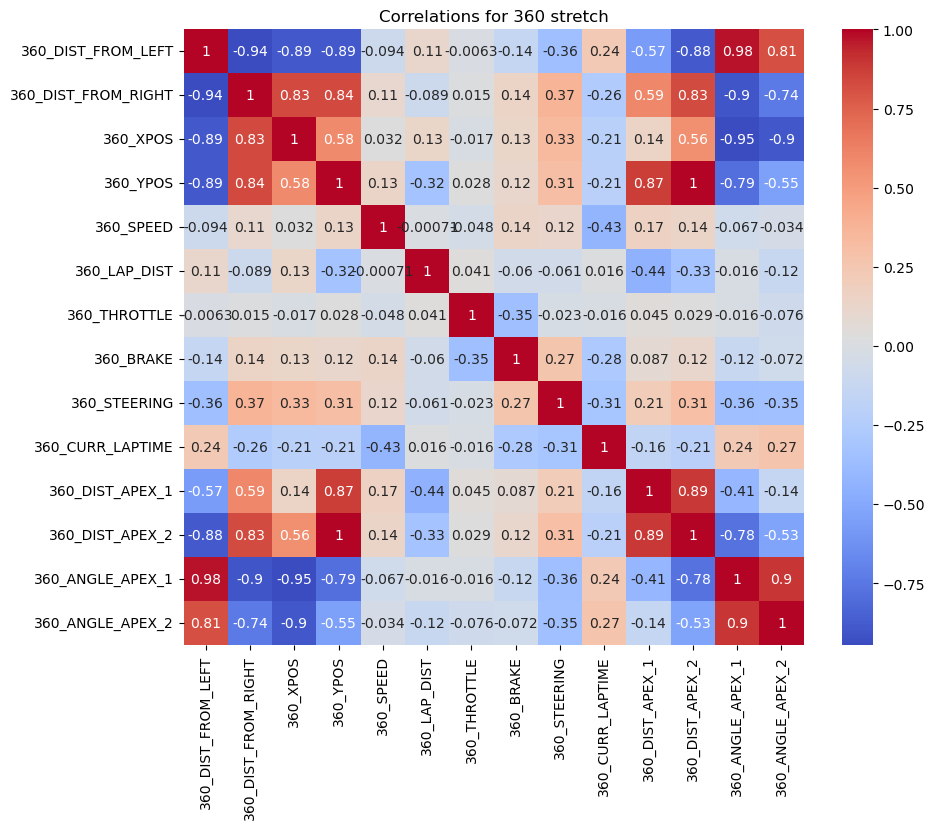

In [34]:
# correlation for each stretch
import matplotlib.pyplot as plt 
import seaborn as sns

cols360List = [col for col in numRacingCols.columns if col.startswith('360_')]
cols387List = [col for col in numRacingCols.columns if col.startswith('387_')]
cols414List = [col for col in numRacingCols.columns if col.startswith('414_')]
cols441List = [col for col in numRacingCols.columns if col.startswith('441_')]
cols468List = [col for col in numRacingCols.columns if col.startswith('468_')]
cols495List = [col for col in numRacingCols.columns if col.startswith('495_')]
cols522List = [col for col in numRacingCols.columns if col.startswith('522_')]

cols360 = racing[cols360List]
cols387 = racing[cols387List]
cols414 = racing[cols414List]
cols441 = racing[cols441List]
cols468 = racing[cols468List]
cols495 = racing[cols495List]
cols522 = racing[cols522List]

corr360Matrix = cols360.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr360Matrix, annot=True, cmap='coolwarm')
plt.title('Correlations for 360 stretch')
plt.savefig('corr360.png', bbox_inches='tight')
plt.show()

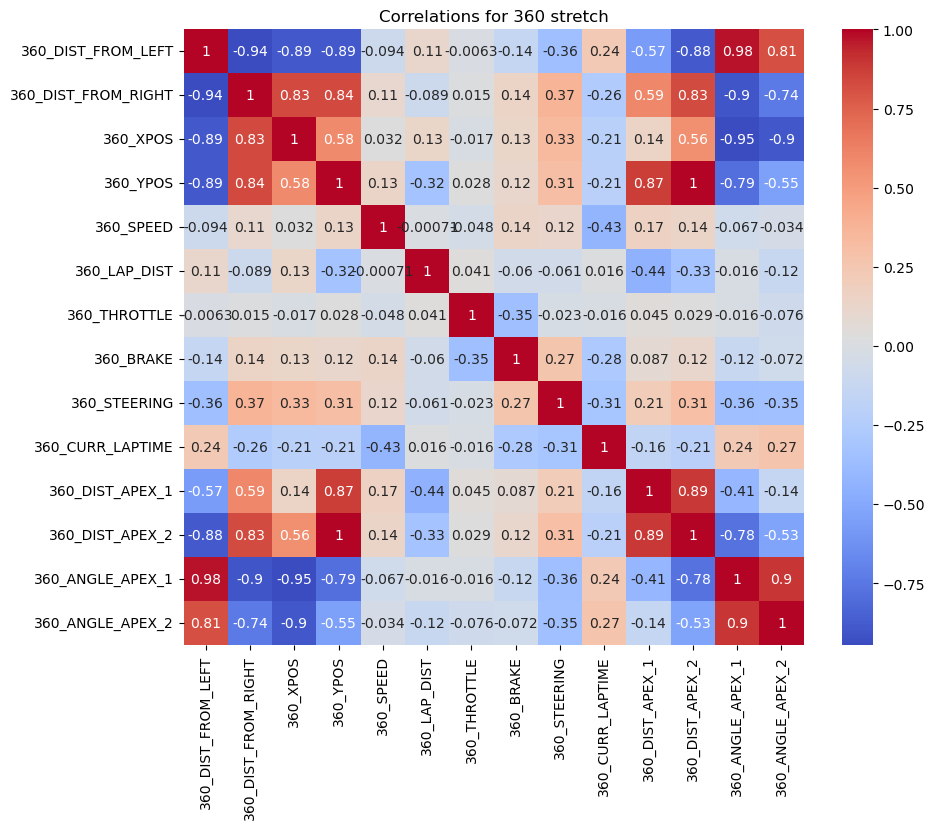

In [35]:
corr360Matrix = cols360.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr360Matrix, annot=True, cmap='coolwarm')
plt.title('Correlations for 360 stretch')
plt.savefig('corr360.png', bbox_inches='tight')
plt.show()

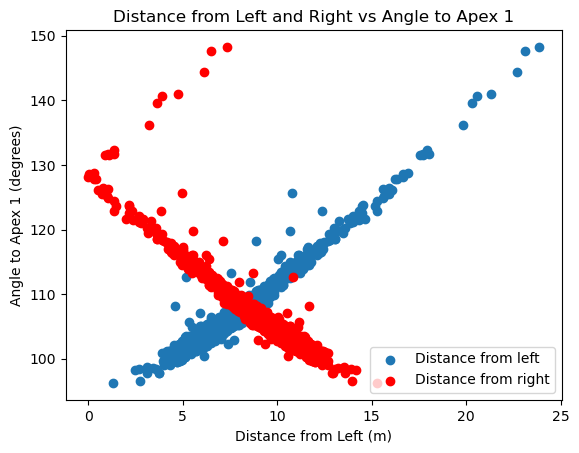

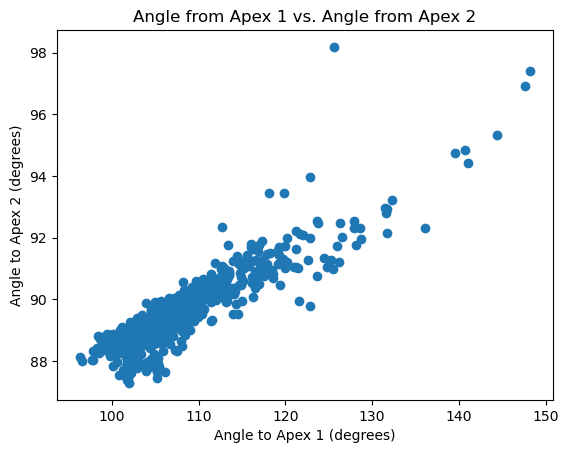

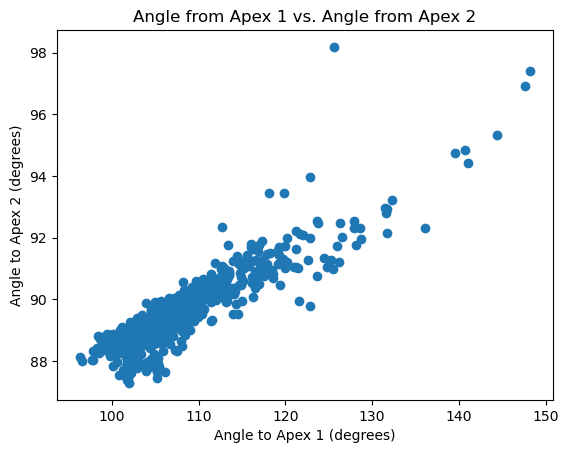

In [36]:
# plot corr between highly correlated variables at 360m 
compareCols = ['360_ANGLE_APEX_1', '360_ANGLE_APEX_2',
               '360_DIST_FROM_LEFT', '360_DIST_FROM_RIGHT',
               '360_DIST_APEX_1', '360_DIST_APEX_2',
               '360_YPOS', '360_XPOS']

compareDF = numRacingCols[compareCols]
plt.scatter(compareDF['360_DIST_FROM_LEFT'], compareDF['360_ANGLE_APEX_1'])
plt.scatter(compareDF['360_DIST_FROM_RIGHT'], compareDF['360_ANGLE_APEX_1'], color='red')
plt.title('Distance from Left and Right vs Angle to Apex 1')
plt.xlabel('Distance from Left (m)')
plt.ylabel('Angle to Apex 1 (degrees)')
plt.legend(['Distance from left', 'Distance from right'])
plt.show()

plt.scatter(compareDF['360_ANGLE_APEX_1'], compareDF['360_ANGLE_APEX_2'])
plt.title('Angle from Apex 1 vs. Angle from Apex 2')
plt.xlabel('Angle to Apex 1 (degrees)')
plt.ylabel('Angle to Apex 2 (degrees)')
plt.show()

plt.scatter(compareDF['360_ANGLE_APEX_1'], compareDF['360_ANGLE_APEX_2'])
plt.title('Angle from Apex 1 vs. Angle from Apex 2')
plt.xlabel('Angle to Apex 1 (degrees)')
plt.ylabel('Angle to Apex 2 (degrees)')
plt.show()



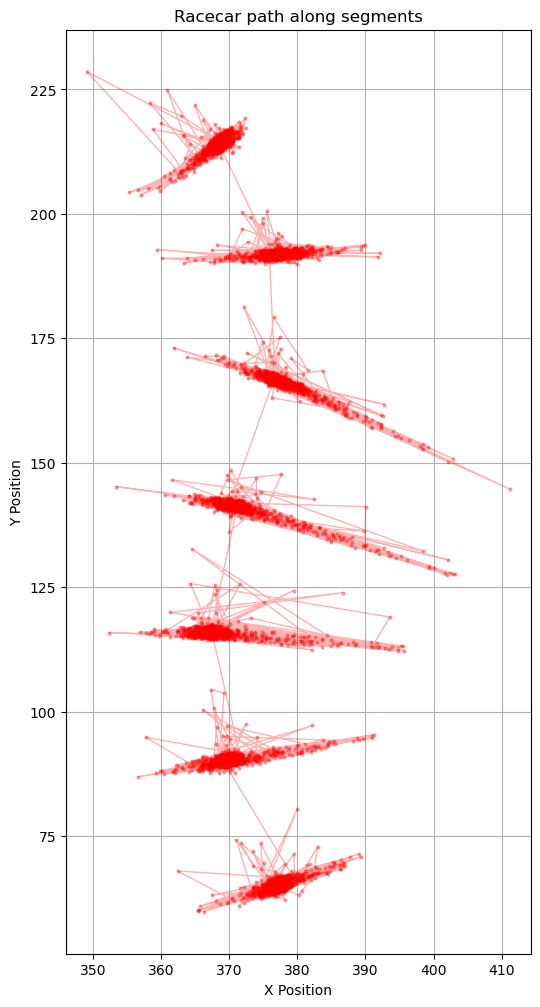

In [37]:
# rough track outline
trackSegments = [col for col in numRacingCols.columns if 'XPOS' in col or 'YPOS' in col]
xPositions = []
yPositions = []

for seg in range(360, 523, 27):
    xPositions += numRacingCols[f'{seg}_XPOS'].tolist()
    yPositions += numRacingCols[f'{seg}_YPOS'].tolist()

plt.figure(figsize=(6, 12))
plt.plot(xPositions, yPositions, marker='o', linestyle='-', color='r', markersize=2, alpha = 0.3, linewidth=1)
plt.title("Racecar path along segments")
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.show()

Segment 360: 896 / 923 points retained after filtering
Segment 387: 909 / 923 points retained after filtering
Segment 414: 878 / 923 points retained after filtering
Segment 441: 845 / 923 points retained after filtering
Segment 468: 836 / 923 points retained after filtering
Segment 495: 854 / 923 points retained after filtering
Segment 522: 882 / 923 points retained after filtering
Apex X Coordinates: [377.2649207409123, 370.29012883405807]
Apex Y Coordinates: [191.98677591990514, 90.48629313440738]


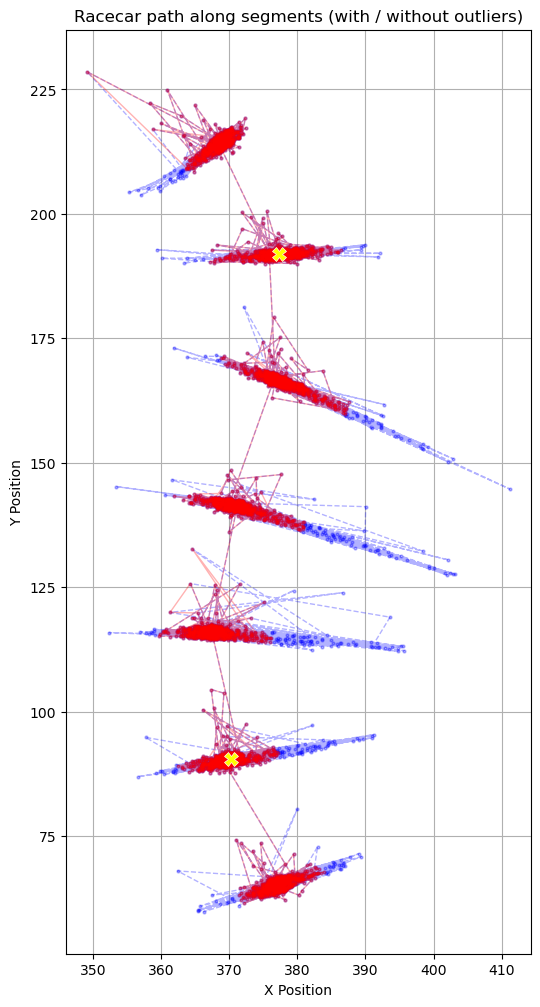

In [108]:
# marking out more data
    # filter out outliers - remove extreme outliers from dist_from_left and dist_from_right (so track more refined) 
    # average track width? idk 
    # mark the apex points 
# filter out outliers using IQR 

import numpy as np
def filterOutliers(df, col, threshold):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    return (df[col] >= Q1 - (threshold * IQR)) & (df[col] <= Q3 + (threshold * IQR))

xPosFilter = []
yPosFilter = []

threshold = 2.5
for seg in range(360, 523, 27):
    xCol = f'{seg}_XPOS'
    yCol = f'{seg}_YPOS'
    leftCol = f'{seg}_DIST_FROM_LEFT'
    rightCol = f'{seg}_DIST_FROM_RIGHT'

    leftFilter = filterOutliers(numRacingCols, leftCol, threshold)
    rightFilter = filterOutliers(numRacingCols, rightCol, threshold)

    #check change
    totalPoints = len(numRacingCols)
    inliers = numRacingCols[leftFilter & rightFilter]
    filteredPoints = len(inliers)
    print(f'Segment {seg}: {filteredPoints} / {totalPoints} points retained after filtering')


    inliers = numRacingCols[leftFilter & rightFilter]
    xPosFilter += inliers[xCol].tolist()
    yPosFilter += inliers[yCol].tolist()

# apex points - see model group 4, specifies apex points around 386m and 494m 
apex_X= [
    numRacingCols['387_XPOS'].mean(),
    numRacingCols['495_XPOS'].mean()
]
apex_Y= [
    numRacingCols['387_YPOS'].mean(),
    numRacingCols['495_YPOS'].mean()
]

#print("Sample xPosFilter:", xPosFilter[:5])
#print("Sample yPosFilter:", yPosFilter[:5])
print("Apex X Coordinates:", apex_X)
print("Apex Y Coordinates:", apex_Y)

plt.figure(figsize=(6, 12))

plt.plot(xPositions, yPositions, marker='o', linestyle='--', color='blue', markersize=2, linewidth=1, alpha=0.3, label='outlier dist')
plt.plot(xPosFilter, yPosFilter, marker='o', linestyle='-', color='red', markersize=2, linewidth=1, alpha=0.3, label='non-outlier dist')
plt.plot(apex_X, apex_Y, marker='X', linestyle='', color='yellow', markersize=10, markeredgewidth=0.5, markeredgecolor='white', label="Apex Points")
plt.title("Racecar path along segments (with / without outliers)")
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.show()

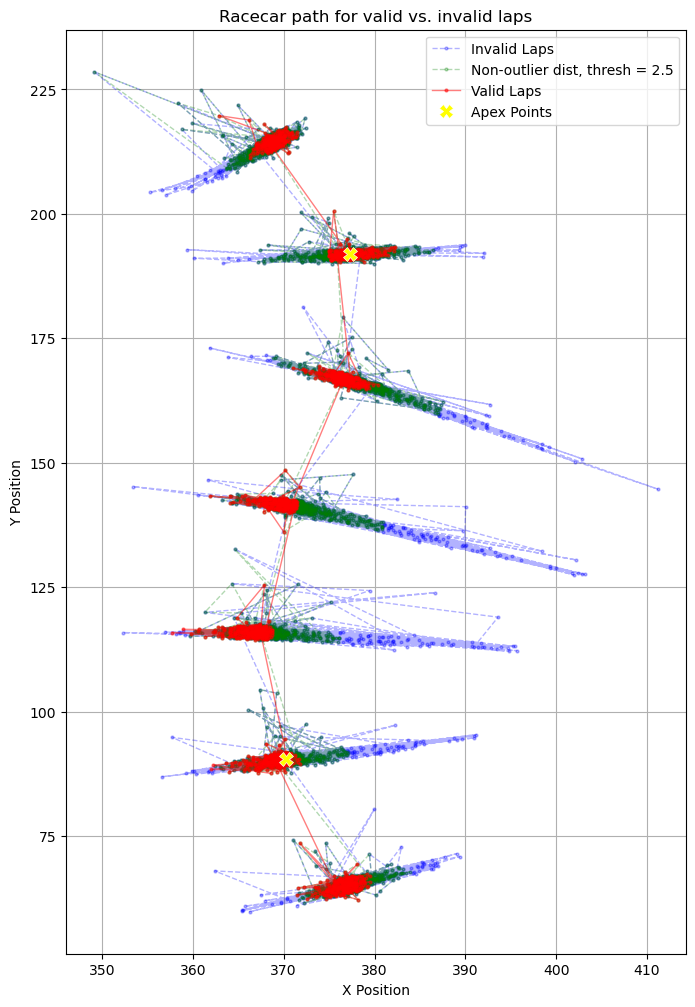

In [39]:
#invalid lap paths vs valid lap paths 
invalidLaps = numRacingCols[numRacingCols['INVALID_LAP'] == 1]
validLaps = numRacingCols[numRacingCols['INVALID_LAP'] == 0]

xPosValid, yPosValid = [], []
xPosInvalid, yPosInvalid = [], [] 

for seg in range(360, 523, 27):
    xCol = f'{seg}_XPOS'
    yCol = f'{seg}_YPOS'
    #valid lists
    xPosValid += validLaps[xCol].tolist()
    yPosValid += validLaps[yCol].tolist()
    #invalid
    xPosInvalid += invalidLaps[xCol].tolist() 
    yPosInvalid += invalidLaps[yCol].tolist()

plt.figure(figsize=(8,12))
plt.plot(xPosInvalid, yPosInvalid, marker='o', linestyle='--', color='blue', markersize=2, linewidth=1, alpha=0.3, label="Invalid Laps")
plt.plot(xPosFilter, yPosFilter, marker='o', linestyle='--', color='green', markersize=2, linewidth=1, alpha=0.3, label='Non-outlier dist, thresh = 2.5')
plt.plot(xPosValid, yPosValid, marker='o', linestyle='-', color='red', markersize=2, linewidth=1, alpha=0.5, label="Valid Laps")
plt.plot(apex_X, apex_Y, marker='X', linestyle='', color='yellow', markersize=10, markeredgewidth=0.5, markeredgecolor='white', label="Apex Points")
plt.title("Racecar path for valid vs. invalid laps")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.legend()
plt.savefig('path.png')
plt.show()


NameError: name 'keyMoments' is not defined

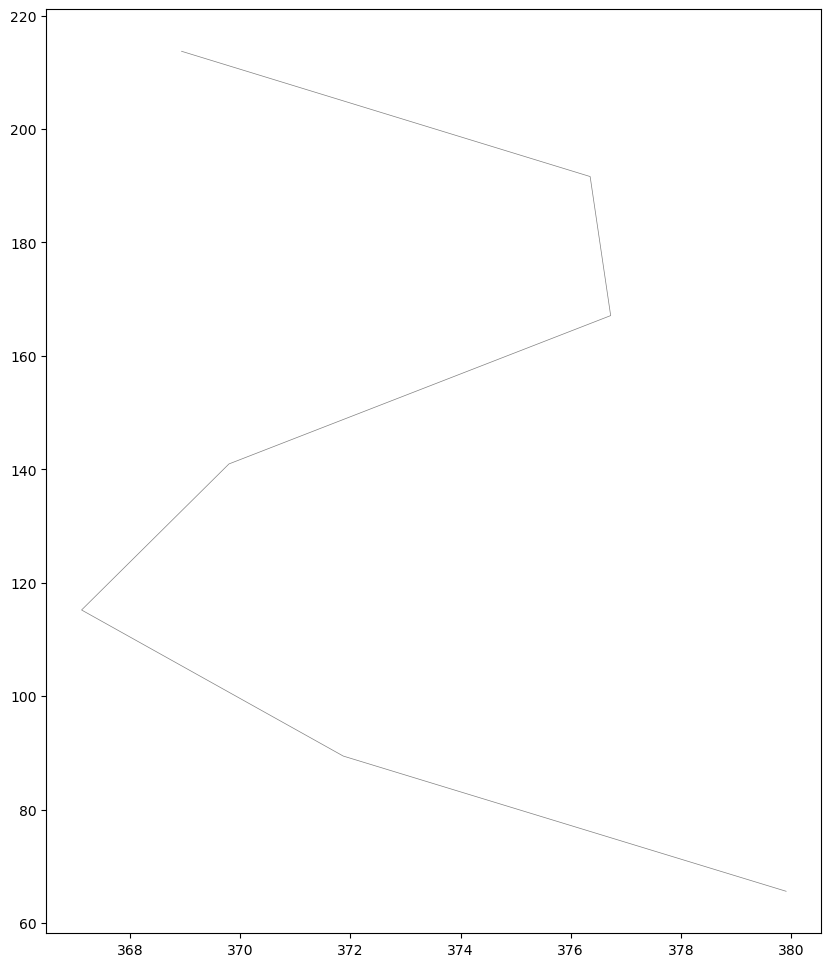

In [41]:
# plot key moments for a single session / lap
sessionID_1 = racing['SESSION_IDENTIFIER'].iloc[0]
sessionID_1_Lap = racing[(racing['SESSION_IDENTIFIER'] == sessionID_1) & (racing['LAP_NUM'] == 1)]
xPosPath = [sessionID_1_Lap[f'{seg}_XPOS'].values[0] for seg in range(360, 523, 27)]
yPosPath = [sessionID_1_Lap[f'{seg}_YPOS'].values[0] for seg in range(360, 523, 27)]
plt.figure(figsize=(10, 12))
plt.plot(xPosPath, yPosPath, color='gray', linewidth=0.5, label='Lap Path')

momentColours = ['blue', 'red', 'orange', 'purple', 'green', 'brown']
momentMarkers = ['o', 's', 'D', 'X', '^', 'P']

for i, moment in enumerate(keyMoments):
    xPosMoment = sessionID_1_Lap[f'{moment}_XPOS'].values[0]
    yPosMoment = sessionID_1_Lap[f'{moment}_YPOS'].values[0]
    #plt.scatter(xPosMoment, yPosMoment, color='black', marker='o', s=50, label=f'{moment} Moment')
    plt.plot(xPosMoment, yPosMoment, 'ko')
    plt.text(xPosMoment, yPosMoment, moment, fontsize=10, ha='right', va='bottom')

plt.plot(xPosInvalid, yPosInvalid, marker='o', linestyle='--', color='blue', markersize=2, linewidth=1, alpha=0.3, label="Invalid Laps")
plt.plot(xPosFilter, yPosFilter, marker='o', linestyle='--', color='green', markersize=2, linewidth=1, alpha=0.3, label='Non-outlier dist')
plt.plot(xPosValid, yPosValid, marker='o', linestyle='-', color='red', markersize=2, linewidth=1, alpha=0.5, label="Valid Laps")

plt.grid(True)
plt.plot(apex_X, apex_Y, marker='X', linestyle='', color='yellow', markersize=5, markeredgewidth=0.5, markeredgecolor='white', label="Apex Points")
plt.title(f"Key Moments for Session {sessionID_1} - Lap 1")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right", fontsize='small', markerscale=0.7)
plt.grid(True)

plt.savefig('keyMomentsSession1Lap1.png', bbox_inches='tight')

plt.show()




In [ ]:

import matplotlib.cm as cm

#valid sessions
validRacingLaps = racing[racing['INVALID_LAP'] == 0]
#count of unique sessions
#uniqueSessionCount = validRacingLaps['SESSION_IDENTIFIER'].nunique()
#print(uniqueSessionCount)

#fastest times
fastestLaps = (
    validRacingLaps.loc[validRacingLaps.groupby('SESSION_IDENTIFIER')['SECTION_TIME_MS'].idxmin()]
    .reset_index(drop=True)
)
fastestLaps = fastestLaps.sort_values(by='SECTION_TIME_MS').head(10)
print(fastestLaps[['SESSION_IDENTIFIER', 'LAP_NUM', 'SECTION_TIME_MS']])


In [ ]:
#slowest laps 
slowestLaps = (
    validRacingLaps.loc[validRacingLaps.groupby('SESSION_IDENTIFIER')['SECTION_TIME_MS'].idxmax()]
    .reset_index(drop=True)
)
slowestLapsHead = slowestLaps.sort_values(by='SECTION_TIME_MS', ascending=False).head(10)
print(slowestLapsHead[['SESSION_IDENTIFIER', 'LAP_NUM', 'SECTION_TIME_MS']])

In [ ]:
# key moments for ALL laps of a given session 
sessionID = '1.4340693167900013e+19'      
session = racing[(racing['SESSION_IDENTIFIER'] == sessionID)]

colourMap = plt.get_cmap('viridis', len(session))

# plot
plt.figure(figsize=(10, 12))
plt.plot(xPosPath, yPosPath, color='gray', linewidth=0.5, label='Lap Path')
keyMoments = ['FB', 'MB', 'FS', 'MS', 'FT', 'MT']

plt.plot(xPosInvalid, yPosInvalid, marker='o', linestyle='--', color='blue', markersize=2, linewidth=1, alpha=0.1, label="Invalid Laps")
plt.plot(xPosValid, yPosValid, marker='o', linestyle='-', color='red', markersize=2, linewidth=1, alpha=0.1, label="Valid Laps")

for i, (index, row) in enumerate(session.iterrows()):
    lap = row['LAP_NUM']
    singleLap = session[session['LAP_NUM'] == lap]
    lapColour = colourMap(i)
    
    for moment in keyMoments:
        xPosMoment = singleLap[f'{moment}_XPOS'].values[0]
        yPosMoment = singleLap[f'{moment}_YPOS'].values[0]
        plt.plot(xPosMoment, yPosMoment, 'o', color=lapColour, markersize=2)
        plt.text(xPosMoment, yPosMoment, f'{moment} ({lap})', fontsize=5, va='bottom', fontweight='ultralight')

plt.title(f"Key Moments for Each Lap in Session {sessionID}")
plt.xlabel("X Position")
plt.ylabel("Y Position")

plt.plot(apex_X, apex_Y, marker='X', linestyle='', color='yellow', markersize=5, markeredgewidth=0.5, markeredgecolor='white', label="Apex Points")

plt.grid(True)
plt.savefig(r'C:\Users\rayya\OneDrive\Documents\2024T3-DATA3001\Modelling\data3001-data-racing-6-main\data3001-data-racing-6-main\my_plots\keyMoments_fastestValidLaps\keyMoments_slowestLap_1.png', bbox_inches='tight')
plt.show()


In [ ]:
#correlation between position of keyMoment and laptime? 
#for moment in keyMoments:
#    cols = [f'{moment}_XPOS', f'{moment}_YPOS', f'{moment}_CURR_LAPTIME']
    
#    corrMatrix = validRacingLaps[cols].corr()
    
#    plt.figure(figsize=(6, 4))
#    sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
#    plt.title(f"Correlation of {moment} Positions with {moment}_CURR_LAPTIME")
#    plt.show()

In [ ]:
# driver inputs vs lap times corr 
# select throttle, brake and steering as driver inputs - im not considering gear and whatnot 
keyMoments = ['FB', 'MB', 'FS', 'MS', 'FT', 'MT']
inputFeatures = ['THROTTLE', 'BRAKE', 'STEERING']
nCols = len(inputFeatures)
nRows = len(keyMoments)

fig, axes = plt.subplots(nRows, nCols, figsize=(15, 10), constrained_layout=True)
for row, moment in enumerate(keyMoments):
    for col, feature in enumerate(inputFeatures):
        laptimeCol = f'{moment}_CURR_LAPTIME'
        featureCol = f'{moment}_{feature}'
        
        sns.regplot(
            x=laptimeCol,
            y=featureCol,
            data=validRacingLaps,
            ax=axes[row, col],
            scatter_kws={'s': 10},
            line_kws={'color': 'red'}
        )
        axes[row, col].set_title(f"{moment} - {feature} vs Lap Time")
        axes[row, col].set_xlabel("Lap Time")
        axes[row, col].set_ylabel(f"{feature}")

fig.suptitle("Driver Inputs vs Lap Time at Key Moments", fontsize=16)
plt.savefig('driverInputsKeyMoments.png')
plt.show()


In [ ]:
# driver inputs vs lap times corr 
# select throttle, brake and steering as driver inputs - im not considering gear and whatnot 
keyMoments = ['FB', 'MB', 'FS', 'MS', 'FT', 'MT']
inputFeatures = ['THROTTLE', 'BRAKE', 'STEERING']
nCols = len(inputFeatures)
nRows = len(keyMoments)

fig, axes = plt.subplots(nRows, nCols, figsize=(15, 10), constrained_layout=True)
for row, moment in enumerate(keyMoments):
    for col, feature in enumerate(inputFeatures):
        laptimeCol = f'{moment}_LAP_DIST'
        featureCol = f'{moment}_{feature}'
        
        sns.regplot(
            x=laptimeCol,
            y=featureCol,
            data=validRacingLaps,
            ax=axes[row, col],
            scatter_kws={'s': 10},
            line_kws={'color': 'red'}
        )
        axes[row, col].set_title(f"{moment} - {feature} vs Lap Distance")
        axes[row, col].set_xlabel("Lap Distance")
        axes[row, col].set_ylabel(f"{feature}")

fig.suptitle("Driver Inputs vs Lap Distance at Key Moments", fontsize=16)
plt.savefig('driverInputsKeyMomentsAgainstDistance.png')
plt.show()


In [ ]:
# driver inputs vs lap times corr 
# select throttle, brake and steering as driver inputs - im not considering gear and whatnot 
keyMoments = ['FB', 'MB', 'FS', 'MS', 'FT', 'MT']
fig, axes = plt.subplots(len(keyMoments), 1, figsize=(10, 18), sharex=True)
inputFeatures = ['THROTTLE', 'BRAKE', 'STEERING']

for i, moment in enumerate(keyMoments):        
    sns.regplot(
        x=f'{moment}_LAP_DIST',
        y=f'{moment}_THROTTLE',
        data=racing,
        ax=axes[i],
        fit_reg=False,
        scatter_kws={'s': 10},
        line_kws={'color': 'blue'},
        label='Throttle'
    )
    sns.regplot(
        x=f'{moment}_LAP_DIST',
        y=f'{moment}_BRAKE',
        data=racing,
        ax=axes[i],
        fit_reg=False,
        scatter_kws={'s': 10},
        line_kws={'color': 'red'},
        label='Brake'
    )
    sns.regplot(
        x=f'{moment}_LAP_DIST',
        y=f'{moment}_STEERING',
        data=racing,
        ax=axes[i],
        fit_reg=False,
        scatter_kws={'s': 10},
        line_kws={'color': 'green'},
        label='Steering'
    )
    axes[i].set_title(f"{moment} - Throttle, Brake, and Steering vs Lap Distance")
    axes[i].set_xlabel("Lap Distance")
    axes[i].set_ylabel("Driver Inputs")
    axes[i].set_xlim(0, 800) 

fig.suptitle("Driver Inputs vs Lap Distance at Key Moments", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 6.5), title="Input Type")
plt.savefig('driverInputsKeyMomentsAgainstDistance2_invalidLapsIncluded.png')
plt.show()


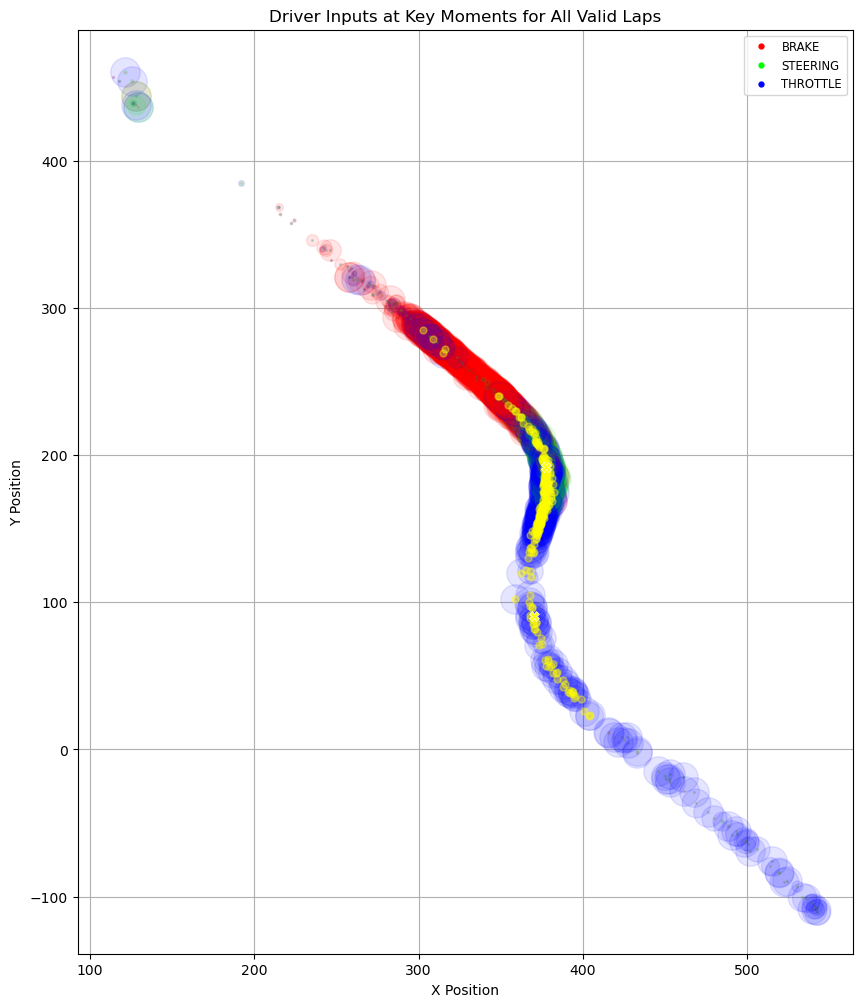

In [174]:
# plot driver inputs along path across all session
inputColours = {'BRAKE': 'red', 'STEERING': 'lime','THROTTLE': 'blue'}
keyMomentInputs = ['THROTTLE', 'BRAKE', 'STEERING']
keyMoments = ['FB', 'MB', 'FS', 'MS', 'FT', 'MT']



plt.figure(figsize=(10, 12))

MT_IQR_min = 228.73
MT_IQR_max = 574.49

MT_IQR_points = validRacingLaps[(validRacingLaps['MT_LAP_DIST'] >= MT_IQR_min) & 
                                (validRacingLaps['MT_LAP_DIST'] <= MT_IQR_max)]

# laps for each session 
for _, singleLap in validRacingLaps.iterrows():    
    for moment in keyMoments:
        xPosMoment = singleLap[f'{moment}_XPOS']
        yPosMoment = singleLap[f'{moment}_YPOS']
        #driver inputs w designated colour 
        for input_type in keyMomentInputs:
            input_value = singleLap[f'{moment}_{input_type}']
            marker_size = 30 + (input_value * 500)  
            marker_color = inputColours[input_type]

            plt.plot(xPosMoment, yPosMoment, 'o', color=marker_color, markersize=marker_size / 25, alpha=0.1)
            #label moment type
            #plt.text(xPosMoment, yPosMoment, f'{moment}', fontsize=7, ha='right', va='bottom')

# Add legend and apex points
plt.plot(MT_IQR_points['MT_XPOS'], MT_IQR_points['MT_YPOS'], 'o', color='yellow', markersize=5, alpha = 0.4, label="MT within IQR range")

plt.plot(apex_X, apex_Y, marker='X', linestyle='', color='yellow', markersize=7, markeredgewidth=0.5, markeredgecolor='white', label="Apex Points")
plt.title("Driver Inputs at Key Moments for All Valid Laps")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend([plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=5) for color in inputColours.values()],
           list(inputColours.keys()), loc="upper right", fontsize='small', markerscale=0.7)
plt.grid(True)

plt.savefig('allValidLaps_keyMoments.png', bbox_inches='tight')
plt.show()


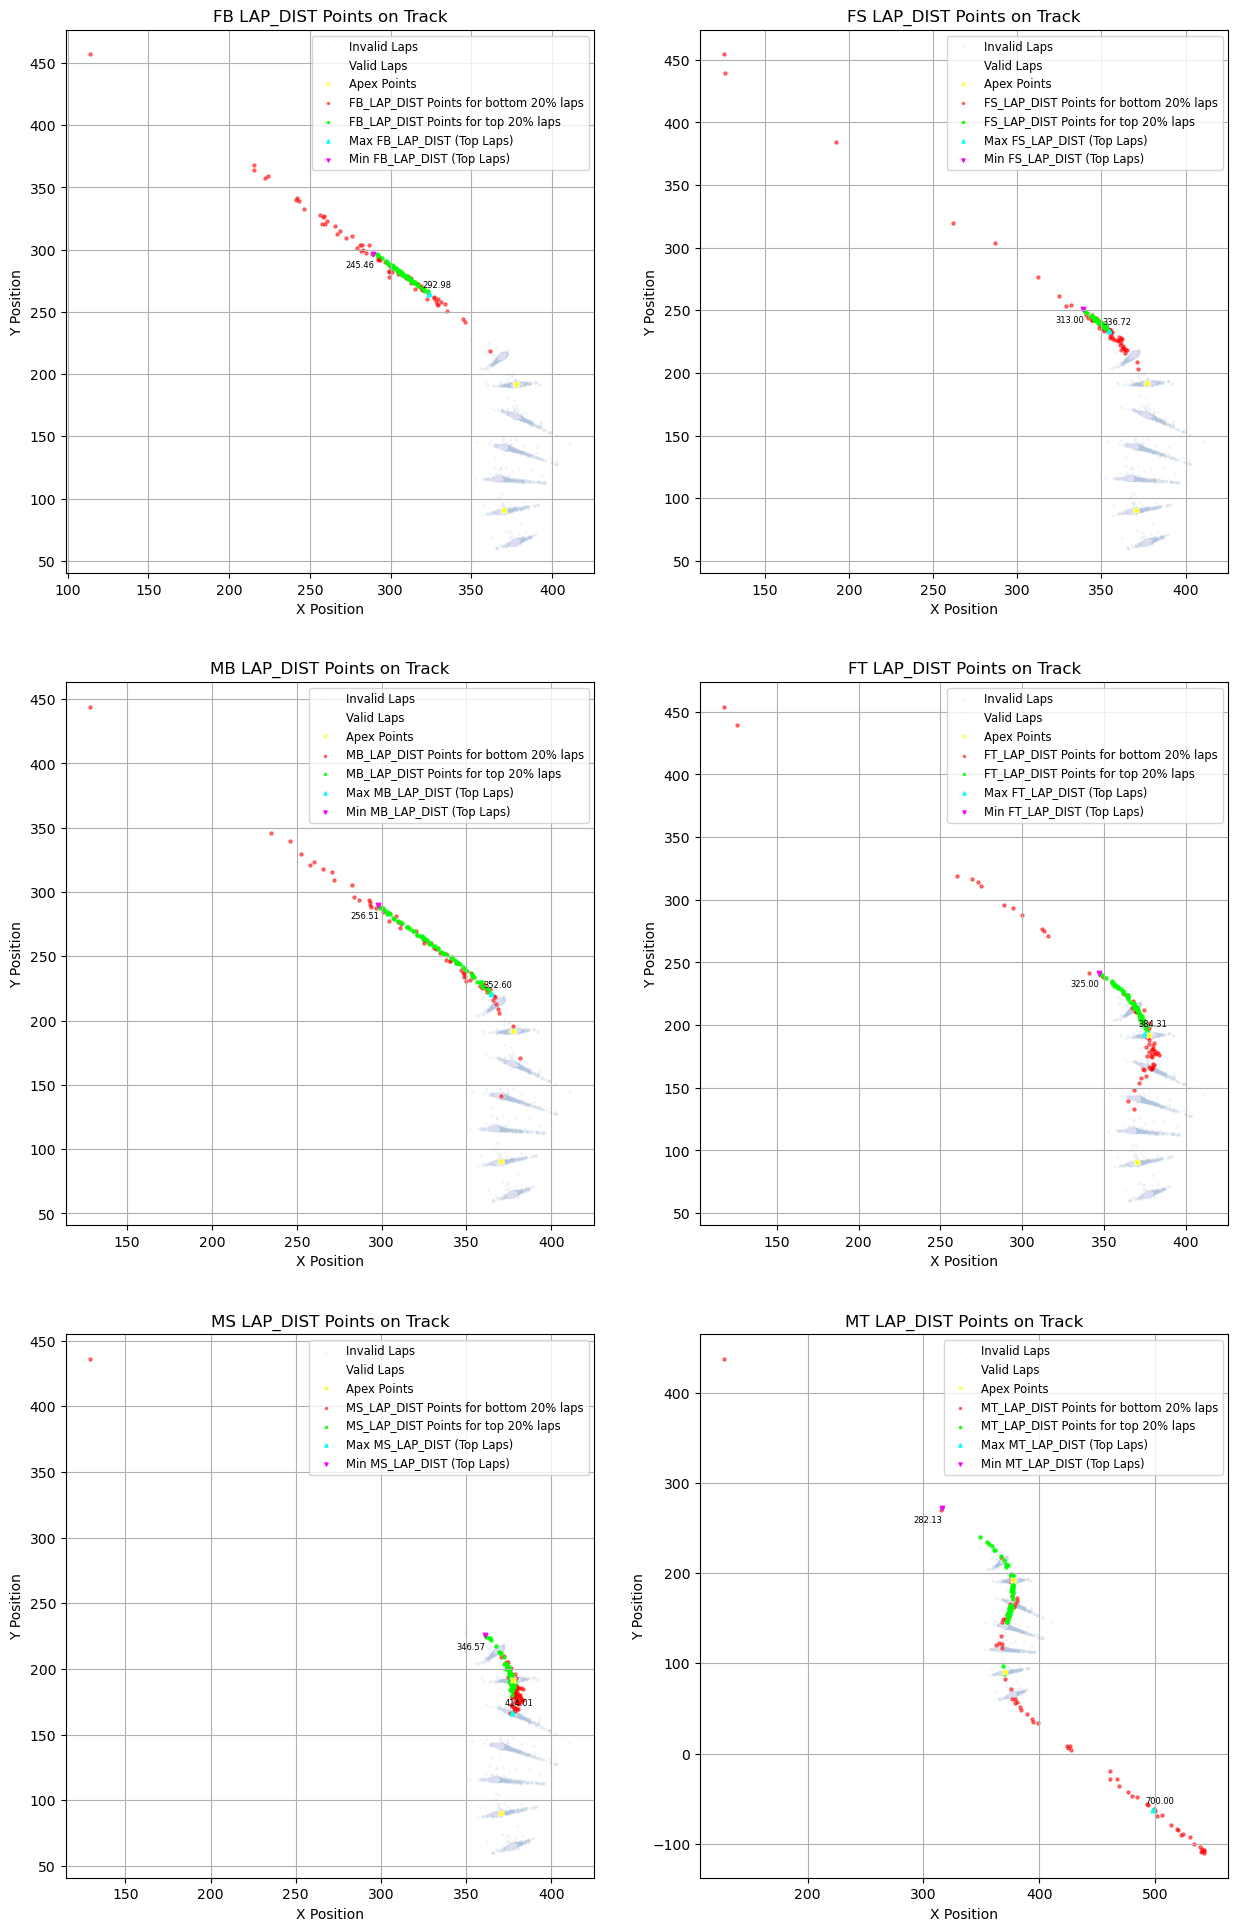

In [107]:
# Define key moments and initialize figure with a larger height
key_moments = ['FB', 'FS', 'MB', 'FT', 'MS', 'MT']
fig, axes = plt.subplots(3, 2, figsize=(15, 24)) 
axes = axes.flatten()  

for i, moment in enumerate(key_moments):
    ax = axes[i]

    top20_percent = fastest_laps[f'{moment}_XPOS'], fastest_laps[f'{moment}_YPOS']
    bottom20_percent = slowest_laps[f'{moment}_XPOS'], slowest_laps[f'{moment}_YPOS']

    max_row = fastest_laps.loc[fastest_laps[f'{moment}_LAP_DIST'].idxmax()]
    min_row = fastest_laps.loc[fastest_laps[f'{moment}_LAP_DIST'].idxmin()]
    max_x, max_y = max_row[f'{moment}_XPOS'], max_row[f'{moment}_YPOS']
    min_x, min_y = min_row[f'{moment}_XPOS'], min_row[f'{moment}_YPOS']
    max_dist, min_dist = max_row[f'{moment}_LAP_DIST'], min_row[f'{moment}_LAP_DIST']
    
#    ax.plot(xPosInvalid, yPosInvalid, marker='o', linestyle='--', color='whitesmoke', markersize=2, linewidth=1, alpha=0.1, label="Invalid Laps")
#    ax.plot(xPosValid, yPosValid, marker='o', linestyle='-', color='white', markersize=2, linewidth=1, alpha=0.1, label="Valid Laps")
    ax.scatter(xPosInvalid, yPosInvalid, color='lightsteelblue', s=2, alpha=0.1, label="Invalid Laps")
    ax.scatter(xPosValid, yPosValid, color='lavender', s=2, alpha=0.1, label="Valid Laps")
    ax.plot(apex_X, apex_Y, marker='X', linestyle='', color='yellow', markersize=5, markeredgewidth=0.5, markeredgecolor='white', label="Apex Points")
    
    ax.scatter(bottom20_percent[0], bottom20_percent[1], color='red', s=5, label=f"{moment}_LAP_DIST Points for bottom 20% laps", alpha=0.5)
    ax.scatter(top20_percent[0], top20_percent[1], color='lime', s=5, label=f"{moment}_LAP_DIST Points for top 20% laps", alpha=0.8)
    ax.scatter(max_x, max_y, color='cyan', s=10, marker='^', label=f"Max {moment}_LAP_DIST (Top Laps)")
    ax.scatter(min_x, min_y, color='magenta', s=10, marker='v', label=f"Min {moment}_LAP_DIST (Top Laps)")

    # Format the distance values to 2 decimal places in the annotations
    ax.annotate(f"{max_dist:.2f}", (max_x, max_y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=6)
    ax.annotate(f"{min_dist:.2f}", (min_x, min_y), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=6)
    
    ax.set_title(f"{moment} LAP_DIST Points on Track")
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.legend(loc="upper right", fontsize='small', markerscale=0.7)
    ax.grid(True)

plt.savefig('key_moments_all.png')
plt.show()


In [159]:
# IQR range ? 
threshold = 3.5
key_moments = ['FB', 'FS', 'MB', 'FT', 'MS', 'MT']
IQR_ranges = {}
for moment in key_moments: 
    lap_dist_cols = f"{moment}_LAP_DIST"
    Q1 = fastest_laps[lap_dist_cols].quantile(0.25)
    Q3 = fastest_laps[lap_dist_cols].quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - (threshold * IQR) 
    upper_bound = Q3 + (threshold * IQR)
    IQR_ranges[lap_dist_cols] = (lower_bound, upper_bound)

print("\nAll IQR Ranges:")
for lap_dist_cols, (lower_bound, upper_bound) in IQR_ranges.items():
    print(f"{lap_dist_cols}: {lower_bound:.2f} to {upper_bound:.2f}")

ranges = {}
for moment in key_moments: 
    lap_dist_cols = f"{moment}_LAP_DIST"
    min_value = fastest_laps[lap_dist_cols].min() 
    max_value = fastest_laps[lap_dist_cols].max() 
    
    ranges[lap_dist_cols] = (min_value, max_value)

print("\nAll Min-Max Ranges for Fastest Laps:")
for lap_dist_cols, (min_value, max_value) in ranges.items():
    print(f"{lap_dist_cols}: {min_value:.2f} to {max_value:.2f}")


All IQR Ranges:
FB_LAP_DIST: 212.58 to 326.03
FS_LAP_DIST: 300.17 to 354.98
MB_LAP_DIST: 128.45 to 478.62
FT_LAP_DIST: 258.93 to 449.95
MS_LAP_DIST: 301.06 to 466.13
MT_LAP_DIST: 228.73 to 574.49

All Min-Max Ranges for Fastest Laps:
FB_LAP_DIST: 245.46 to 292.98
FS_LAP_DIST: 313.00 to 336.72
MB_LAP_DIST: 256.51 to 352.60
FT_LAP_DIST: 325.00 to 384.31
MS_LAP_DIST: 346.57 to 414.01
MT_LAP_DIST: 282.13 to 700.00


In [127]:
import pandas as pd

thresholds = [0, 0.5, 1, 1.5, 2]
key_moments = ['FB', 'FS', 'MB', 'FT', 'MS', 'MT']
moment_conditions = {
    'MB': 'FB',
    'MT': 'FB',
    'MS': 'FS'
}
IQR_results = {}

for threshold in thresholds:
    IQR_ranges = {}
    is_valid = True 
    
    for moment in key_moments:
        lap_dist_col = f"{moment}_LAP_DIST"
        Q1 = fastest_laps[lap_dist_col].quantile(0.25)
        Q3 = fastest_laps[lap_dist_col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        IQR_ranges[lap_dist_col] = (lower_bound, upper_bound)
        
        if moment in moment_conditions:
            prev_moment = moment_conditions[moment]
            prev_upper_bound = IQR_ranges[f"{prev_moment}_LAP_DIST"][1]
            if lower_bound < prev_upper_bound:
                is_valid = False
                print(f"Threshold {threshold} failed for {moment} with condition {moment}_LAP_DIST > {prev_moment}_LAP_DIST")
    
    if is_valid:
        print(f"Threshold {threshold} passed all conditions.")
        IQR_results[threshold] = IQR_ranges

print("\nValid IQR Ranges for Each Threshold:")
for threshold, ranges in IQR_results.items():
    print(f"\nThreshold: {threshold}")
    for moment, (lower, upper) in ranges.items():
        print(f"{moment}: {lower:.2f} to {upper:.2f}")


Threshold 0 passed all conditions.
Threshold 0.5 failed for MB with condition MB_LAP_DIST > FB_LAP_DIST
Threshold 1 failed for MB with condition MB_LAP_DIST > FB_LAP_DIST
Threshold 1.5 failed for MB with condition MB_LAP_DIST > FB_LAP_DIST
Threshold 2 failed for MB with condition MB_LAP_DIST > FB_LAP_DIST
Threshold 2 failed for MS with condition MS_LAP_DIST > FS_LAP_DIST
Threshold 2 failed for MT with condition MT_LAP_DIST > FB_LAP_DIST

Valid IQR Ranges for Each Threshold:

Threshold: 0
FB_LAP_DIST: 262.21 to 276.39
FS_LAP_DIST: 324.15 to 331.00
MB_LAP_DIST: 281.65 to 325.42
FT_LAP_DIST: 342.50 to 366.38
MS_LAP_DIST: 373.28 to 393.91
MT_LAP_DIST: 380.00 to 423.22


In [135]:
import pandas as pd
# for all valid laps instead of the top 20 
thresholds = [0, 0.5, 1, 1.5, 2]
key_moments = ['FB', 'FS', 'MB', 'FT', 'MS', 'MT']
moment_conditions = {
    'MB': 'FB',
    'MT': 'FB',
    'MS': 'FS'
}
IQR_results = {}

for threshold in thresholds:
    IQR_ranges = {}
    is_valid = True 
    
    for moment in key_moments:
        lap_dist_col = f"{moment}_LAP_DIST"
        Q1 = fastest_laps[lap_dist_col].quantile(0.25)
        Q3 = fastest_laps[lap_dist_col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        IQR_ranges[lap_dist_col] = (lower_bound, upper_bound)
        
        if moment in moment_conditions:
            prev_moment = moment_conditions[moment]
            prev_upper_bound = IQR_ranges[f"{prev_moment}_LAP_DIST"][1]
            min_val = lower_bound 
            
            print(f"Comparing {moment}_LAP_DIST (min: {min_val:.2f}) with {prev_moment}_LAP_DIST (max: {prev_upper_bound:.2f})")

            if moment == 'MT' and min_val <= prev_upper_bound:
                is_valid = False
                print(f"Threshold {threshold} failed for {moment} with condition min({moment}_LAP_DIST) > max({prev_moment}_LAP_DIST)")
            elif min_val < prev_upper_bound:  # non-strict inequality for others
                is_valid = False
                print(f"Threshold {threshold} failed for {moment} with condition min({moment}_LAP_DIST) >= max({prev_moment}_LAP_DIST)")

    if is_valid:
        print(f"Threshold {threshold} passed all conditions.")
        IQR_results[threshold] = IQR_ranges

print("\nValid IQR Ranges for Each Threshold:")
for threshold, ranges in IQR_results.items():
    print(f"\nThreshold: {threshold}")
    for moment, (lower, upper) in ranges.items():
        print(f"{moment}: {lower:.2f} to {upper:.2f}")


Comparing MB_LAP_DIST (min: 281.65) with FB_LAP_DIST (max: 276.39)
Comparing MS_LAP_DIST (min: 373.28) with FS_LAP_DIST (max: 331.00)
Comparing MT_LAP_DIST (min: 380.00) with FB_LAP_DIST (max: 276.39)
Threshold 0 passed all conditions.
Comparing MB_LAP_DIST (min: 259.76) with FB_LAP_DIST (max: 283.48)
Threshold 0.5 failed for MB with condition min(MB_LAP_DIST) >= max(FB_LAP_DIST)
Comparing MS_LAP_DIST (min: 362.96) with FS_LAP_DIST (max: 334.43)
Comparing MT_LAP_DIST (min: 358.39) with FB_LAP_DIST (max: 283.48)
Comparing MB_LAP_DIST (min: 237.88) with FB_LAP_DIST (max: 290.57)
Threshold 1 failed for MB with condition min(MB_LAP_DIST) >= max(FB_LAP_DIST)
Comparing MS_LAP_DIST (min: 352.65) with FS_LAP_DIST (max: 337.85)
Comparing MT_LAP_DIST (min: 336.78) with FB_LAP_DIST (max: 290.57)
Comparing MB_LAP_DIST (min: 215.99) with FB_LAP_DIST (max: 297.67)
Threshold 1.5 failed for MB with condition min(MB_LAP_DIST) >= max(FB_LAP_DIST)
Comparing MS_LAP_DIST (min: 342.33) with FS_LAP_DIST (max

In [130]:
thresholds = np.arange(0, 0.51, 0.01)
key_moments = ['FB', 'FS', 'MB', 'FT', 'MS', 'MT']
moment_conditions = {
    'MB': 'FB',
    'MT': 'FB',
    'MS': 'FS'
}
IQR_results = {}

for threshold in thresholds:
    IQR_ranges = {}
    is_valid = True 
    
    for moment in key_moments:
        lap_dist_col = f"{moment}_LAP_DIST"
        Q1 = fastest_laps[lap_dist_col].quantile(0.25)
        Q3 = fastest_laps[lap_dist_col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        IQR_ranges[lap_dist_col] = (lower_bound, upper_bound)
        
        if moment in moment_conditions:
            prev_moment = moment_conditions[moment]
            prev_upper_bound = IQR_ranges[f"{prev_moment}_LAP_DIST"][1]
            if lower_bound < prev_upper_bound:
                is_valid = False
                print(f"Threshold {threshold} failed for {moment} with condition {moment}_LAP_DIST > {prev_moment}_LAP_DIST")
    
    if is_valid:
        print(f"Threshold {threshold} passed all conditions.")
        IQR_results[threshold] = IQR_ranges

print("\nValid IQR Ranges for Each Threshold:")
for threshold, ranges in IQR_results.items():
    print(f"\nThreshold: {threshold}")
    for moment, (lower, upper) in ranges.items():
        print(f"{moment}: {lower:.2f} to {upper:.2f}")


Threshold 0.0 passed all conditions.
Threshold 0.01 passed all conditions.
Threshold 0.02 passed all conditions.
Threshold 0.03 passed all conditions.
Threshold 0.04 passed all conditions.
Threshold 0.05 passed all conditions.
Threshold 0.06 passed all conditions.
Threshold 0.07 passed all conditions.
Threshold 0.08 passed all conditions.
Threshold 0.09 passed all conditions.
Threshold 0.1 failed for MB with condition MB_LAP_DIST > FB_LAP_DIST
Threshold 0.11 failed for MB with condition MB_LAP_DIST > FB_LAP_DIST
Threshold 0.12 failed for MB with condition MB_LAP_DIST > FB_LAP_DIST
Threshold 0.13 failed for MB with condition MB_LAP_DIST > FB_LAP_DIST
Threshold 0.14 failed for MB with condition MB_LAP_DIST > FB_LAP_DIST
Threshold 0.15 failed for MB with condition MB_LAP_DIST > FB_LAP_DIST
Threshold 0.16 failed for MB with condition MB_LAP_DIST > FB_LAP_DIST
Threshold 0.17 failed for MB with condition MB_LAP_DIST > FB_LAP_DIST
Threshold 0.18 failed for MB with condition MB_LAP_DIST > FB_L

FB: X_POS = 301.27667236328125, Y_POS = 286.5519104003906
FS: X_POS = 341.6627502441406, Y_POS = 246.4726104736328
FT: X_POS = 350.905413955062, Y_POS = 237.58097660967104
MB: X_POS = 321.0946044921875, Y_POS = 267.9844055175781
MS: X_POS = 375.32415771484375, Y_POS = 198.88221740722656
MT: X_POS = 369.4973449707031, Y_POS = 215.4045562744141


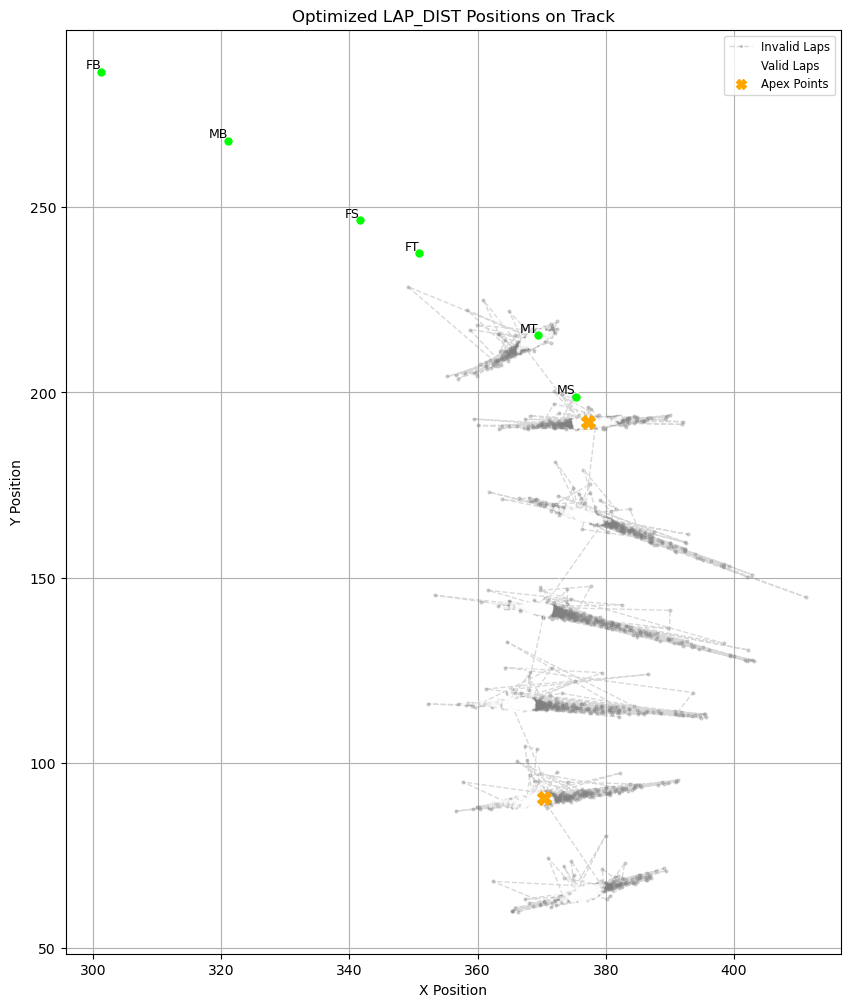

In [178]:
# plotting optimal paths based on GBR results 
optimal_lap_distances = {
    'FB': 261.3,
    'FS': 318.27,
    'FT': 331.59,
    'MB': 288.54,
    'MS': 376.54,
    'MT': 360
}

optimal_positions = {}

for moment, opt_lap_dist in optimal_lap_distances.items():
    lap_dist_col = f'{moment}_LAP_DIST'
    xpos_col = f'{moment}_XPOS'
    ypos_col = f'{moment}_YPOS'
    
    closest_row = validRacingLaps.iloc[(validRacingLaps[lap_dist_col] - opt_lap_dist).abs().argsort()[:1]]
    x_pos = closest_row[xpos_col].values[0]
    y_pos = closest_row[ypos_col].values[0]
    
    optimal_positions[moment] = (x_pos, y_pos)
    print(f"{moment}: X_POS = {x_pos}, Y_POS = {y_pos}")
plt.figure(figsize=(10, 12))

plt.plot(xPosInvalid, yPosInvalid, marker='o', linestyle='--', color='gray', markersize=2, linewidth=1, alpha=0.3, label="Invalid Laps")
plt.plot(xPosValid, yPosValid, marker='o', linestyle='-', color='white', markersize=2, linewidth=1, alpha=0.5, label="Valid Laps")

for moment, (x_pos, y_pos) in optimal_positions.items():
    plt.plot(x_pos, y_pos, 'o', color='lime', markersize=5)
    plt.text(x_pos, y_pos, f"{moment}", fontsize=9, ha='right', va='bottom', color='black')

plt.plot(apex_X, apex_Y, marker='X', linestyle='', color='orange', markersize=10, label="Apex Points")
plt.title("Optimized LAP_DIST Positions on Track")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right", fontsize='small', markerscale=0.7)
plt.grid(True)

plt.savefig('optimised_LAP_DIST_gbr.png')
plt.show()

FB: X_POS = 306.4454301825155, Y_POS = 280.8211641068066
FS: X_POS = 348.97027587890625, Y_POS = 240.76593017578125
FT: X_POS = 367.3694458007813, Y_POS = 219.0157623291016
MB: X_POS = 330.8747863769531, Y_POS = 256.3160095214844
MS: X_POS = 376.9182434082031, Y_POS = 195.2300567626953
MT: X_POS = 379.9494323730469, Y_POS = 174.97900390625


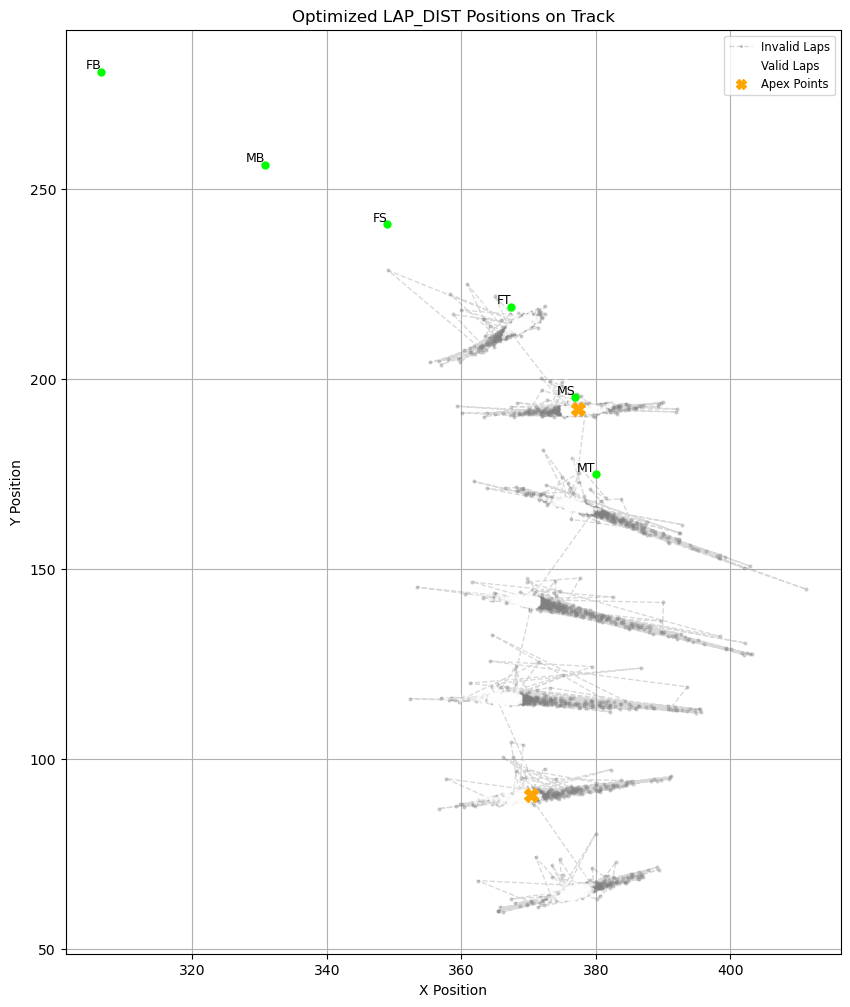

In [179]:
# plotting optimal lap_dist based on optimiser results


optimal_lap_distances = {
    'FB': 269.19,
    'FS': 327.41,
    'FT': 355.81,
    'MB': 303.58,
    'MS': 381.97,
    'MT': 405.36
}

optimal_positions = {}

for moment, opt_lap_dist in optimal_lap_distances.items():
    lap_dist_col = f'{moment}_LAP_DIST'
    xpos_col = f'{moment}_XPOS'
    ypos_col = f'{moment}_YPOS'
    
    closest_row = validRacingLaps.iloc[(validRacingLaps[lap_dist_col] - opt_lap_dist).abs().argsort()[:1]]
    x_pos = closest_row[xpos_col].values[0]
    y_pos = closest_row[ypos_col].values[0]
    
    optimal_positions[moment] = (x_pos, y_pos)
    print(f"{moment}: X_POS = {x_pos}, Y_POS = {y_pos}")
plt.figure(figsize=(10, 12))

plt.plot(xPosInvalid, yPosInvalid, marker='o', linestyle='--', color='gray', markersize=2, linewidth=1, alpha=0.3, label="Invalid Laps")
plt.plot(xPosValid, yPosValid, marker='o', linestyle='-', color='white', markersize=2, linewidth=1, alpha=0.5, label="Valid Laps")

for moment, (x_pos, y_pos) in optimal_positions.items():
    plt.plot(x_pos, y_pos, 'o', color='lime', markersize=5)
    plt.text(x_pos, y_pos, f"{moment}", fontsize=9, ha='right', va='bottom', color='black')

plt.plot(apex_X, apex_Y, marker='X', linestyle='', color='orange', markersize=10, label="Apex Points")
plt.title("Optimized LAP_DIST Positions on Track")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.legend(loc="upper right", fontsize='small', markerscale=0.7)
plt.grid(True)

plt.savefig('optimised_LAP_DIST_optimiser.png')
plt.show()

In [ ]:
# fuck it lets run a model...
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
# from dataset import Dataset 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

X=validRacingLaps[['FB_BRAKE', 'MB_BRAKE', 'FT_THROTTLE', 'MT_THROTTLE', 'FS_STEERING', 'FS_BRAKE', 'MS_STEERING', 'MS_BRAKE', 'MS_THROTTLE',
                   'FB_SPEED', 'FT_SPEED', 'MT_SPEED', 'FS_SPEED', 'MS_SPEED',
                  'FB_DIST_APEX_1', 'FS_DIST_APEX_1', 'FT_DIST_APEX_1', 'MS_DIST_APEX_1', 'MS_DIST_APEX_2', 'MB_DIST_APEX_1', 'MT_DIST_APEX_1',
                  'MT_DIST_APEX_2',
                   'FS_DIST_FROM_LEFT', 'FT_DIST_FROM_LEFT', 'MS_DIST_FROM_LEFT', 'MT_DIST_FROM_LEFT',
                  'FB_ANGLE_APEX_1', 'MB_ANGLE_APEX_1', 'FS_ANGLE_APEX_1', 'MS_ANGLE_APEX_1', 'MS_ANGLE_APEX_2', 'FT_ANGLE_APEX_1', 'FT_ANGLE_APEX_2',
                  'MT_ANGLE_APEX_1', 'MT_ANGLE_APEX_2',
                  'FB_LAP_DIST', 'MB_LAP_DIST', 'FS_LAP_DIST', 'MS_LAP_DIST', 'FT_LAP_DIST', 'MT_LAP_DIST']]
y=validRacingLaps['SECTION_TIME_MS']

In [ ]:
#baseline model
crossValidation = KFold(n_splits=10, shuffle=True, random_state=1)
for depth in range(1, 10): 
    tree_regressor=tree.DecisionTreeRegressor(max_depth=depth, random_state=1) 
    if tree_regressor.fit(X,y).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_regressor, X, y,
                                 scoring='neg_mean_squared_error',
                                 cv=crossValidation, n_jobs=1))
    print(depth, score) 
# lowest = max depth of 3 for score of -1310778.610073403

In [ ]:
#GBR=GradientBoostingRegressor()
#search_grid={'n_estimators':[500,1000,2000], 'learning_rate':[0.001,0.01,0.1],
#            'max_depth':[1,2,4], 'subsample':[0.5, 0.75, 1], 'random_state':[1]}
#search=GridSearchCV(estimator=GBR,param_grid=search_grid,
#                   scoring='neg_mean_squared_error',n_jobs=1,cv=crossValidation)

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from dataset import Dataset
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": ridge.coef_})
print(coefficients.sort_values(by="Coefficient", ascending=False))

In [ ]:
# plotting total throttle patterns? 
throttleList = [
    'TOTAL_THROTTLE_360_387', 'TOTAL_BRAKING_360_387',
    'TOTAL_THROTTLE_387_414', 'TOTAL_BRAKING_387_414',
    'TOTAL_THROTTLE_414_441', 'TOTAL_BRAKING_414_441',
    'TOTAL_THROTTLE_441_468', 'TOTAL_BRAKING_441_468',
    'TOTAL_THROTTLE_468_495', 'TOTAL_BRAKING_468_495',
    'TOTAL_THROTTLE_495_522', 'TOTAL_BRAKING_495_522', 
]
segments = ['360_387', '387_414', '414_441', '441_468', '468_495', '495_522']
throttleValidMean = [validLaps[f'TOTAL_THROTTLE_{seg}'].mean() for seg in segments]
brakingValidMean = [validLaps[f'TOTAL_BRAKING_{seg}'].mean() for seg in segments]
throttleInvalidMean = [invalidLaps[f'TOTAL_THROTTLE_{seg}'].mean() for seg in segments]
brakingInvalidMean = [invalidLaps[f'TOTAL_BRAKING_{seg}'].mean() for seg in segments]

plt.figure(figsize=(10, 6))
plt.plot(segments, throttleValidMean, marker='o', color='blue', linestyle = '-', label='Total Throttle Valid')
plt.plot(segments, brakingValidMean, marker='o', color='red', linestyle = '-', label='Total Braking Valid')
plt.plot(segments, throttleInvalidMean, marker='o', color='blue', linestyle = '--', alpha = 0.7, label='Total Throttle Invalid')
plt.plot(segments, brakingInvalidMean, marker='o', color='red', linestyle = '--', alpha = 0.7, label='Total Braking Invalid')
plt.title('Average throttle and braking across segments for valid and invalid laps')
plt.xlabel('Track segment')
plt.ylabel('Average value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
corr387Matrix = cols387.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr387Matrix, annot=True, cmap='coolwarm')
plt.title('Correlations for 387 stretch')
plt.savefig('corr387.png', bbox_inches='tight')
plt.show()

In [ ]:
corr414Matrix = cols414.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr414Matrix, annot=True, cmap='coolwarm')
plt.title('Correlations for 414 stretch')
plt.savefig('corr414.png', bbox_inches='tight')
plt.show()

In [ ]:
corr441Matrix = cols441.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr441Matrix, annot=True, cmap='coolwarm')
plt.title('Correlations for 441 stretch')
plt.savefig('corr441.png', bbox_inches='tight')
plt.show()

In [ ]:
corr468Matrix = cols468.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr468Matrix, annot=True, cmap='coolwarm')
plt.title('Correlations for 468 stretch')
plt.savefig('corr468.png', bbox_inches='tight')
plt.show()

In [ ]:
corr495Matrix = cols495.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr495Matrix, annot=True, cmap='coolwarm')
plt.title('Correlations for 495 stretch')
plt.savefig('corr495.png', bbox_inches='tight')
plt.show()

In [ ]:
corr522Matrix = cols522.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr522Matrix, annot=True, cmap='coolwarm')
plt.title('Correlations for 522 stretch')
plt.savefig('corr522.png', bbox_inches='tight')
plt.show()